# Import libraries and set visualising parameters

In [ ]:
# Library imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# Set up visual parameters

plt.style.use('seaborn-whitegrid')
sns.set_style("darkgrid")
%matplotlib inline

# Data loading

In [ ]:
# Define the path to dataset, read it to wariable and explore with describe() function

df_url = r"https://stats.idre.ucla.edu/stat/data/hsbdemo.dta"

df = pd.read_stata(df_url)

# Exploring the dataset

In [ ]:
# Take a look at the overall staistics of numerical variables

df.describe()

,id,read,write,math,science,socst,awards,cid
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,52.230000,52.775002,52.645000,51.849998,52.404999,1.670000,10.430000
std,57.879185,10.252936,9.478589,9.368445,9.900891,10.735793,1.818691,5.801152
min,1.000000,28.000000,31.000000,33.000000,26.000000,26.000000,0.000000,1.000000
25%,50.750000,44.000000,45.750000,45.000000,44.000000,46.000000,0.000000,5.000000
50%,100.500000,50.000000,54.000000,52.000000,53.000000,52.000000,1.000000,10.500000
75%,150.250000,60.000000,60.000000,59.000000,58.000000,61.000000,2.000000,15.000000
max,200.000000,76.000000,67.000000,75.000000,74.000000,71.000000,7.000000,20.000000


In [ ]:
# Lets take a look at what unique values do we have

df.nunique()

id         200
female       2
ses          3
schtyp       2
prog         3
read        30
write       29
math        40
science     34
socst       22
honors       2
awards       7
cid         20
dtype: int64

In [ ]:
# Check if any null values are present. Also check for variable types.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   id       200 non-null    float32 
 1   female   200 non-null    category
 2   ses      200 non-null    category
 3   schtyp   200 non-null    category
 4   prog     200 non-null    category
 5   read     200 non-null    float32 
 6   write    200 non-null    float32 
 7   math     200 non-null    float32 
 8   science  200 non-null    float32 
 9   socst    200 non-null    float32 
 10  honors   200 non-null    category
 11  awards   200 non-null    float32 
 12  cid      200 non-null    int16   
dtypes: category(5), float32(7), int16(1)
memory usage: 8.9 KB


In [ ]:
# Take a look at the first 5 rows

df.head(5)

,id,female,ses,schtyp,prog,read,write,math,science,socst,honors,awards,cid
0,45.0,female,low,public,vocation,34.0,35.0,41.0,29.0,26.0,not enrolled,0.0,1
1,108.0,male,middle,public,general,34.0,33.0,41.0,36.0,36.0,not enrolled,0.0,1
2,15.0,male,high,public,vocation,39.0,39.0,44.0,26.0,42.0,not enrolled,0.0,1
3,67.0,male,low,public,vocation,37.0,37.0,42.0,33.0,32.0,not enrolled,0.0,1
4,153.0,male,middle,public,vocation,39.0,31.0,40.0,39.0,51.0,not enrolled,0.0,1


In [ ]:
# Take a look at the last 5 rows

df.tail(5)

,id,female,ses,schtyp,prog,read,write,math,science,socst,honors,awards,cid
195,100.0,female,high,public,academic,63.0,65.0,71.0,69.0,71.0,enrolled,5.0,20
196,143.0,male,middle,public,vocation,63.0,63.0,75.0,72.0,66.0,enrolled,4.0,20
197,68.0,male,middle,public,academic,73.0,67.0,71.0,63.0,66.0,enrolled,7.0,20
198,57.0,female,middle,public,academic,71.0,65.0,72.0,66.0,56.0,enrolled,5.0,20
199,132.0,male,middle,public,academic,73.0,62.0,73.0,69.0,66.0,enrolled,3.0,20


In [ ]:
# Get rid of columns we don't need for analysis: CID and ID

df.drop(['id', 'cid'], axis=1, inplace=True)

In [ ]:
# Let's add new data column: the mean of all subject scores

df['total_score'] = (df['read'] + df['write'] + df['math'] + df['science'] + df['socst']) / 5

# Data plotting

## Matplotlib library

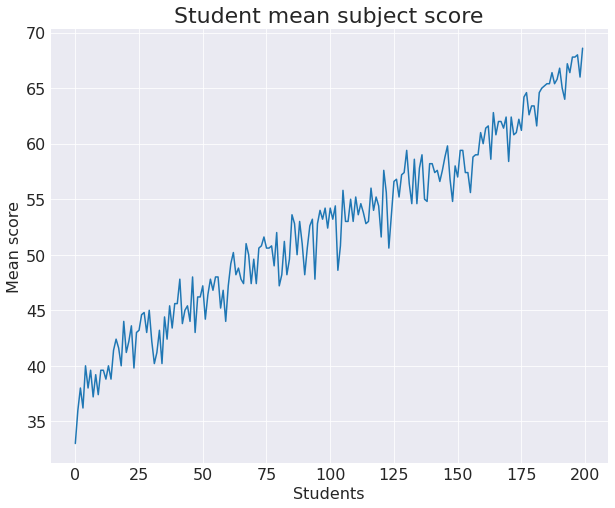

In [ ]:
# Simple line plot

plt.figure(figsize=(10,8))
plt.plot('total_score', data=df)
plt.title("Student mean subject score", fontsize=22)
plt.xlabel('Students')
plt.ylabel('Mean score')
plt.show()

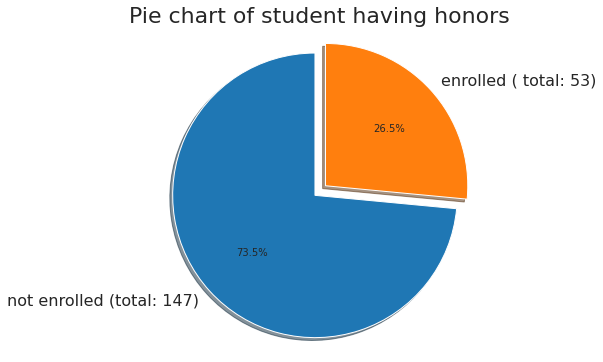

In [ ]:
# Pie plot

# Get a pandas series with sum of having honors and not having honors only
df_pie = df.groupby('honors').size() 

# Get labels with total student number in each category
labels = str(df_pie.index[0]) + ' (total: ' + str(df_pie[0]) + ')', str(df_pie.index[1]) + ' ( total: ' +  str(df_pie[1]) + ')' 

# "Explode" first part of a pie
explode = (0.1, 0) 

fig, ax = plt.subplots(figsize=(8,6))
ax.pie(df_pie, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

# Decoration 
plt.title("Pie chart of student having honors", fontsize=22)
ax.axis('equal') # Makes circle look like a circle
plt.ylabel("") # Avoid having a Y-axis title

plt.show()

## Plotly library

### Histogram

In [ ]:
fig = px.histogram(df, x="total_score", color='prog', nbins=30, title='Histogram of student mean score distribution')
fig.show()

### Scatter matrix

In [ ]:
# Scatter matrix allows to view correlation between several variables in one plot

fig = px.scatter_matrix(df, dimensions=['read', 'write', 'math', 'science', 'socst', 'awards'], color="female", symbol="female",
                        title="Correlation matrix between subjects and awards", width=1000, height=1000)
fig.show()

## Seaborn library


### Heatmap plot

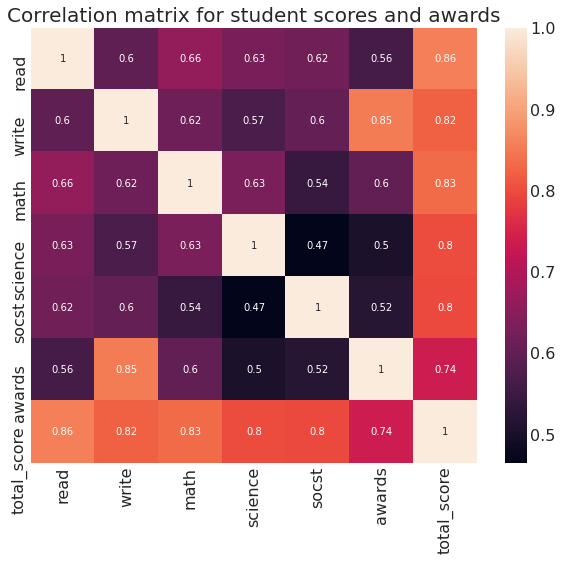

In [ ]:
correlation = df.corr() # Variable to store correlation from the dataset

plt.figure(figsize=(10,8))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
plt.title('Correlation matrix for student scores and awards', fontsize=20)
plt.show()

### Scatterplots

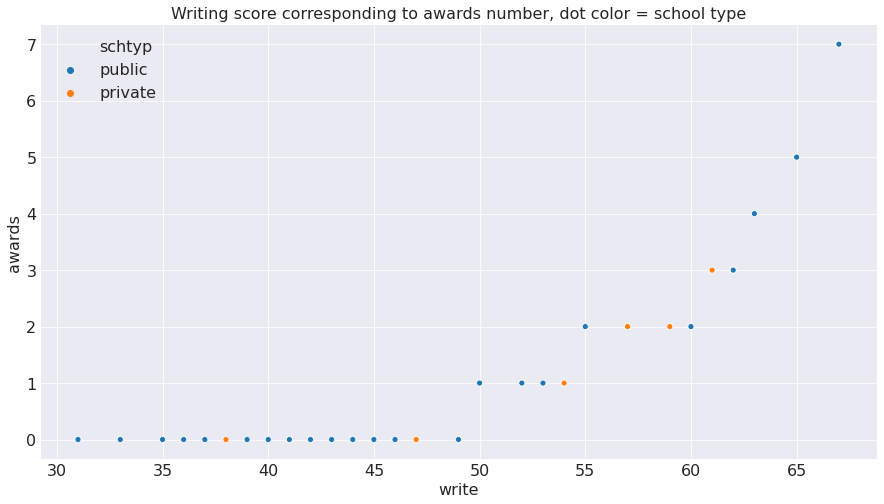

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['write'], y=df['awards'], hue=df['schtyp'])
plt.title('Writing score corresponding to awards number, dot color = school type')
plt.show()

### Swarmplot

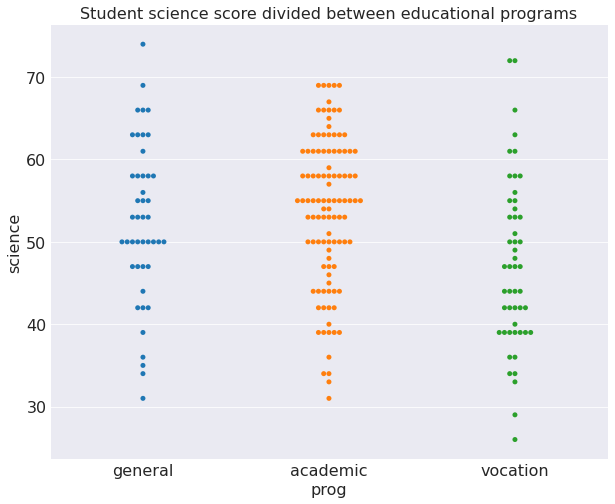

In [ ]:
plt.figure(figsize=(10,8))
sns.swarmplot(x=df['prog'], y=df['science'])
plt.title('Student science score divided between educational programs')
plt.show()

### Violin plot

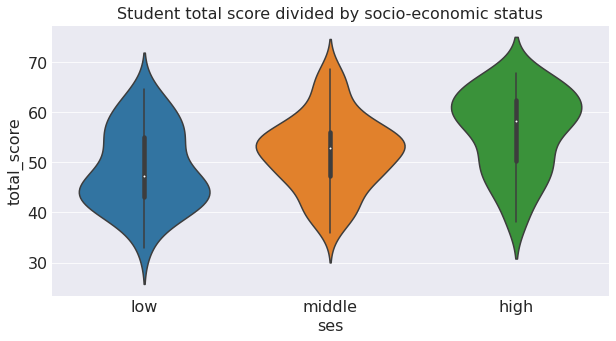

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x=df['ses'], y=df['total_score'])
plt.title('Student total score divided by socio-economic status')
plt.show()

### KDE plot

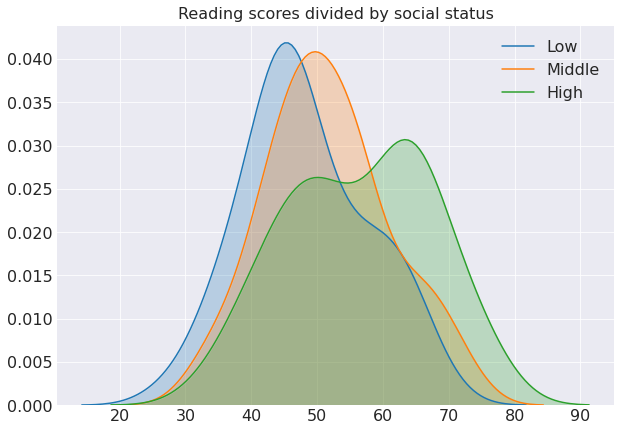

In [ ]:
# KDE plots for each SES

plt.figure(figsize=(10,7))

sns.kdeplot(data=df.read[df['ses']=='low'], label="Low", shade=True)
sns.kdeplot(data=df.read[df['ses']=='middle'], label="Middle", shade=True)
sns.kdeplot(data=df.read[df['ses']=='high'], label="High", shade=True)

# Add title
plt.title("Reading scores divided by social status")

plt.legend()
plt.show()

### Seaborn faceting

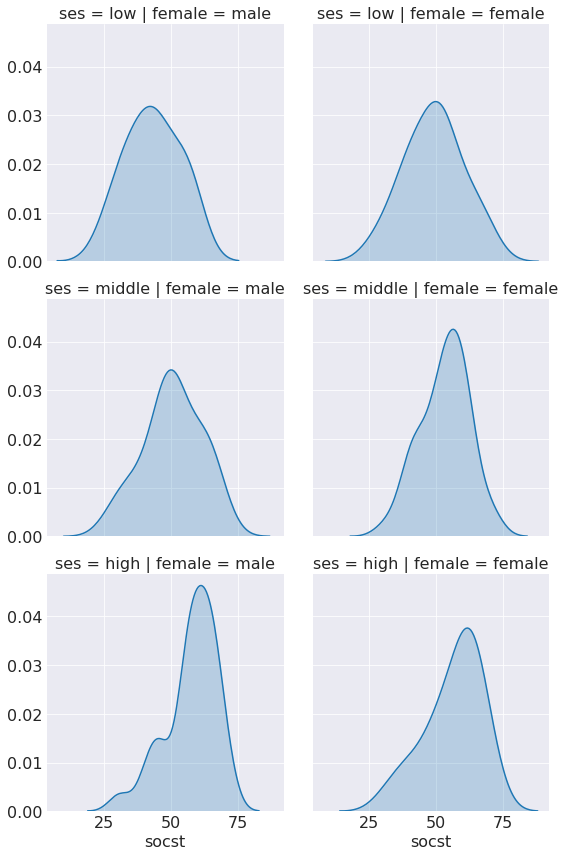

In [ ]:
g = sns.FacetGrid(df, row='ses', col='female', size=4)
g.map(sns.kdeplot, 'socst', shade=True)